<h1><center><u>Final Year Project</u></h1></center>
<center>Exploratory Data Analysis (EDA) Notebook</center>


### Name     - Sanket Madan Bairagi
### College Name - B. K. Birla College kalyan.
### Students ID - 45164      
### Class - M.Sc. In Data Science And Big Data Analytics     
### Semester - 4 (Part - II)   
### Project Name - Heart Disease Prediction
### Datset Link - https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

----------

This Notebook is concerned with exploring the data, the relation of heart disease with other features on data, and the patterns and insights hidden inside the data.

#### 1. Importing Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import warnings 
warnings.filterwarnings("ignore")

#### 2. Loading Dataset 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SanketBairagi/FinalPro/main/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df=df[df["SleepTime"] <11] 

In [6]:
df=df[df["SleepTime"]>4]

In [7]:
df["Smoking"]= df.apply(lambda x:"Smoker" if x["Smoking"]=="Yes" else "Non Smoker",axis=1)

In [8]:
df["AlcoholDrinking"]= df.apply(lambda x:"Alcoholic" if x["AlcoholDrinking"]=="Yes" else "Non Alcoholic",axis=1)

In [9]:
df["BMICAT"]= df.apply(lambda x:"under weight" if x["BMI"]<18.5 else x["BMI"],axis=1)

In [10]:
df["BMICAT"]= df.apply(lambda x:"Noraml weight" if 18.5<=x["BMI"]<25.0 else x["BMICAT"],axis=1)

In [11]:
df["BMICAT"]= df.apply(lambda x:"over weight" if 25.0<=x["BMI"]<30.0 else x["BMICAT"],axis=1)

In [12]:
df["BMICAT"]= df.apply(lambda x:"obese" if x["BMI"]>=30.0 else x["BMICAT"],axis=1)

In [13]:
df["SleepTimeCat"]= df.apply(lambda x:"Poor Sleep < 7 Hr." if x["SleepTime"]<7 else x["SleepTime"],axis=1)

In [14]:
df["SleepTimeCat"]= df.apply(lambda x:"Good Sleep 7-9 Hr." if 7<= x["SleepTime"]<=9 else x["SleepTimeCat"],axis=1)

In [15]:
df["SleepTimeCat"]= df.apply(lambda x:"Over Sleep > 8 Hr." if x["SleepTime"]>9 else x["SleepTimeCat"],axis=1)

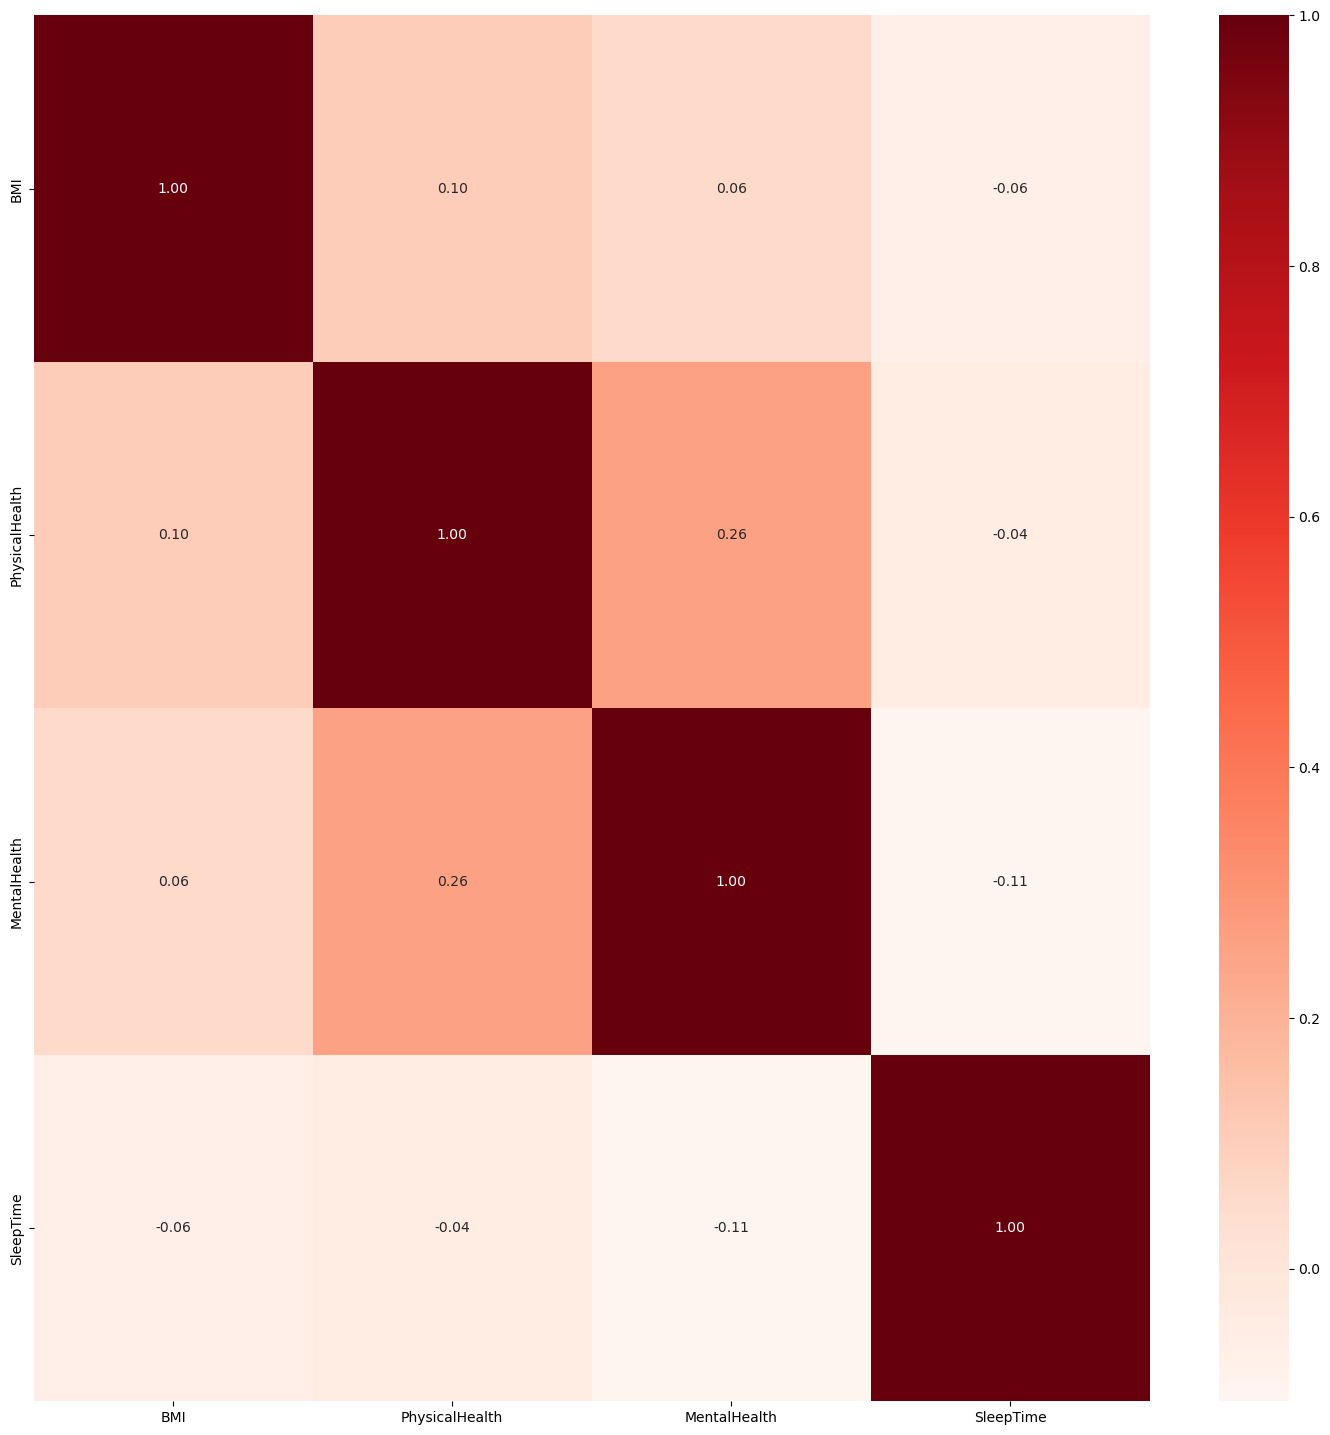

In [16]:
plt.figure(figsize=(18,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [17]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['Age'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['Age'] = df['Age'].astype('int')

In [18]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT,SleepTimeCat,Age
0,No,16.60,Smoker,Non Alcoholic,No,3.0,30.0,No,Female,55-59,...,Yes,Yes,Very good,5.0,Yes,No,Yes,under weight,Poor Sleep < 7 Hr.,57
1,No,20.34,Non Smoker,Non Alcoholic,Yes,0.0,0.0,No,Female,80 or older,...,No,Yes,Very good,7.0,No,No,No,Noraml weight,Good Sleep 7-9 Hr.,80
2,No,26.58,Smoker,Non Alcoholic,No,20.0,30.0,No,Male,65-69,...,Yes,Yes,Fair,8.0,Yes,No,No,over weight,Good Sleep 7-9 Hr.,67
3,No,24.21,Non Smoker,Non Alcoholic,No,0.0,0.0,No,Female,75-79,...,No,No,Good,6.0,No,No,Yes,Noraml weight,Poor Sleep < 7 Hr.,77
4,No,23.71,Non Smoker,Non Alcoholic,No,28.0,0.0,Yes,Female,40-44,...,No,Yes,Very good,8.0,No,No,No,Noraml weight,Good Sleep 7-9 Hr.,42


In [19]:
df.shape

(305095, 21)

The data sample is very informative and is represented by 318 thousand patients on 20 criteria.

#### 3. Columns Name

In [20]:
print(list(df.columns))

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'BMICAT', 'SleepTimeCat', 'Age']


#### 4. Column Descriptions


* **HeartDisease:** Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
* **BMI:** Body Mass Index (BMI).
* **Smoking:** Have you smoked at least 100 cigarettes in your entire life?
* **AlcoholDrinking:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
* **Stroke:** (Ever told) (you had) a stroke?
* **PhysicalHealth:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
* **MentalHealth:** Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
* **DiffWalking:** Do you have serious difficulty walking or climbing stairs?
* **Sex:** Are you male or female?
* **AgeCategory:** Fourteen-level age category. (then calculated the mean)
* **Race:** Imputed race/ethnicity value.
* **Diabetic:** (Ever told) (you had) diabetes?
* **PhysicalActivity:** Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
* **GenHealth:** Would you say that in general your health is...
* **SleepTime:** On average, how many hours of sleep do you get in a 24-hour period?
* **Asthma:** (Ever told) (you had) asthma?
* **KidneyDisease:** Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* **SkinCancer:** (Ever told) (you had) skin cancer?


#### 5. Checking Null / Misssing values 

In [21]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
BMICAT              0
SleepTimeCat        0
Age                 0
dtype: int64

There are no missing values!

#### 6. Information of Dataset

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305095 entries, 0 to 319794
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      305095 non-null  object 
 1   BMI               305095 non-null  float64
 2   Smoking           305095 non-null  object 
 3   AlcoholDrinking   305095 non-null  object 
 4   Stroke            305095 non-null  object 
 5   PhysicalHealth    305095 non-null  float64
 6   MentalHealth      305095 non-null  float64
 7   DiffWalking       305095 non-null  object 
 8   Sex               305095 non-null  object 
 9   AgeCategory       305095 non-null  object 
 10  Race              305095 non-null  object 
 11  Diabetic          305095 non-null  object 
 12  PhysicalActivity  305095 non-null  object 
 13  GenHealth         305095 non-null  object 
 14  SleepTime         305095 non-null  float64
 15  Asthma            305095 non-null  object 
 16  KidneyDisease     30

#### 7. Statistical description of dataset

In [23]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Age
count,305095.000000,305095.000000,305095.000000,305095.000000,305095.000000
mean,28.263328,3.079998,3.621089,7.157272,54.360252
std,6.277987,7.561576,7.590524,1.098027,17.743474
min,12.020000,0.000000,0.000000,5.000000,21.000000
25%,24.020000,0.000000,0.000000,6.000000,42.000000
50%,27.290000,0.000000,0.000000,7.000000,57.000000
75%,31.320000,1.000000,3.000000,8.000000,67.000000
max,94.850000,30.000000,30.000000,10.000000,80.000000


#### 8. Count of Dependent Variable ( HeartDisease )

In [24]:
df.value_counts(["HeartDisease"])

HeartDisease
No              280094
Yes              25001
dtype: int64

#### 9. Distribution of the target variable ( HeartDisease )

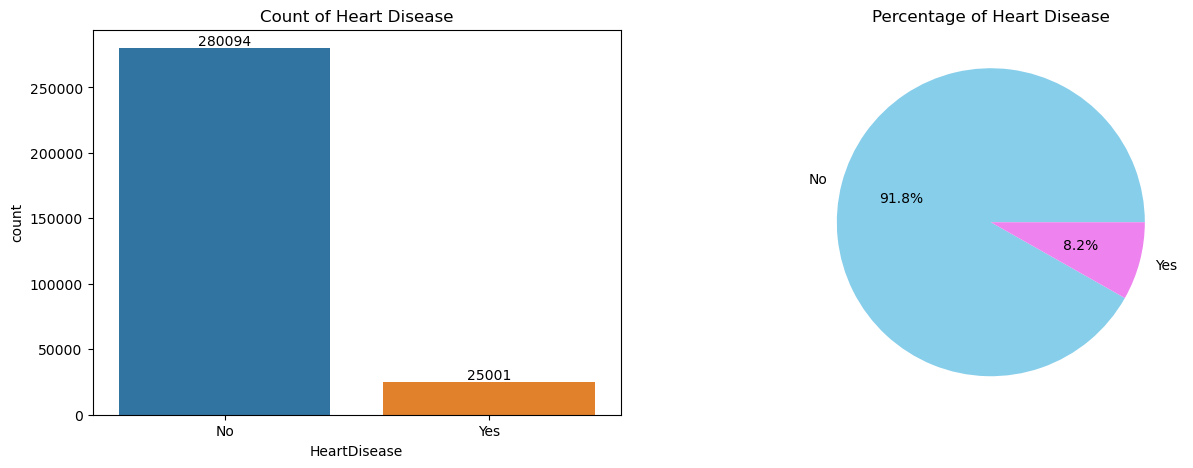

In [25]:
colors = ["skyblue","violet"]
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Count of Heart Disease')
ax= sns.countplot(x='HeartDisease',data=df)
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(1,2,2)
plt.pie(df['HeartDisease'].value_counts().values,labels=df["HeartDisease"].value_counts().index,autopct='%0.1f%%',colors=colors)
plt.title("Percentage of Heart Disease")
plt.show()

data is unbalanced, where the majority of people are healthy.  
Approximately 9 in 100 people suffer from heart disease in the united states.



#### 11. visualization of Count of Categorical Variables

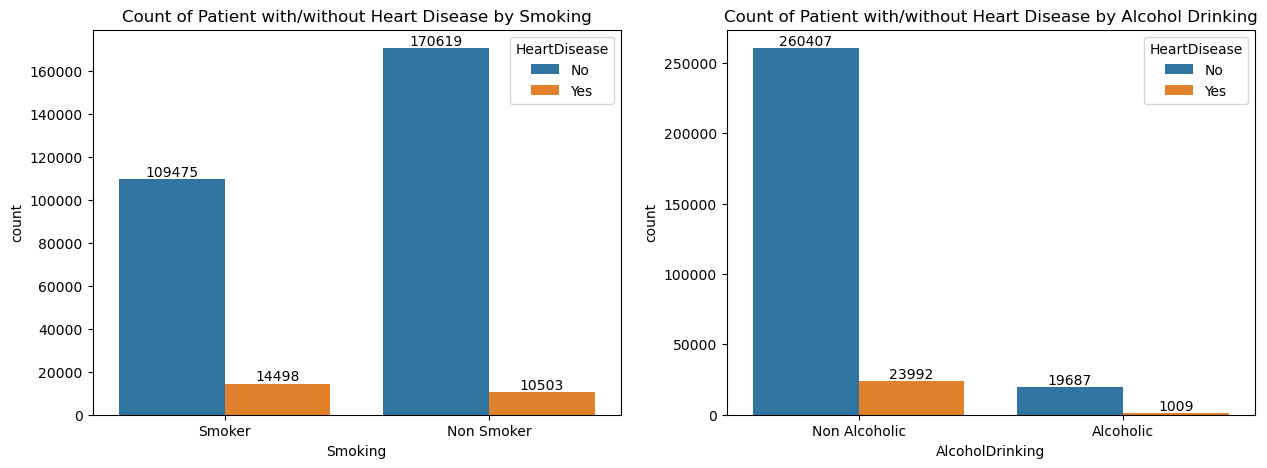

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Count of Patient with/without Heart Disease by Smoking')
ax= sns.countplot(x='Smoking',data=df,hue=df["HeartDisease"])
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(1,2,2)
plt.title('Count of Patient with/without Heart Disease by Alcohol Drinking')
ax=sns.countplot(x='AlcoholDrinking',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)

plt.show()

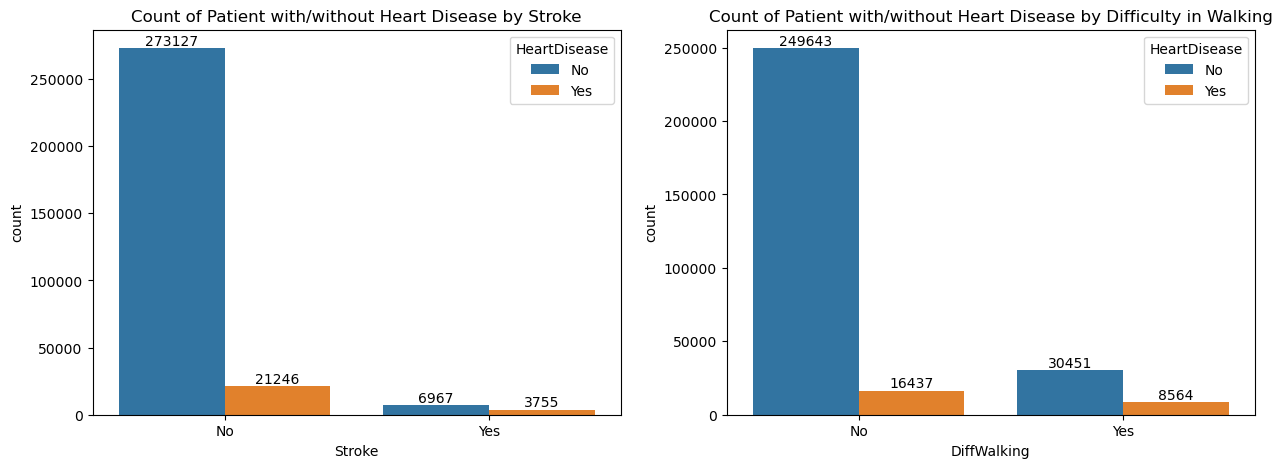

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Count of Patient with/without Heart Disease by Stroke')
ax=sns.countplot(x='Stroke',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.title('Count of Patient with/without Heart Disease by Difficulty in Walking')
ax=sns.countplot(x='DiffWalking',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)

plt.show()


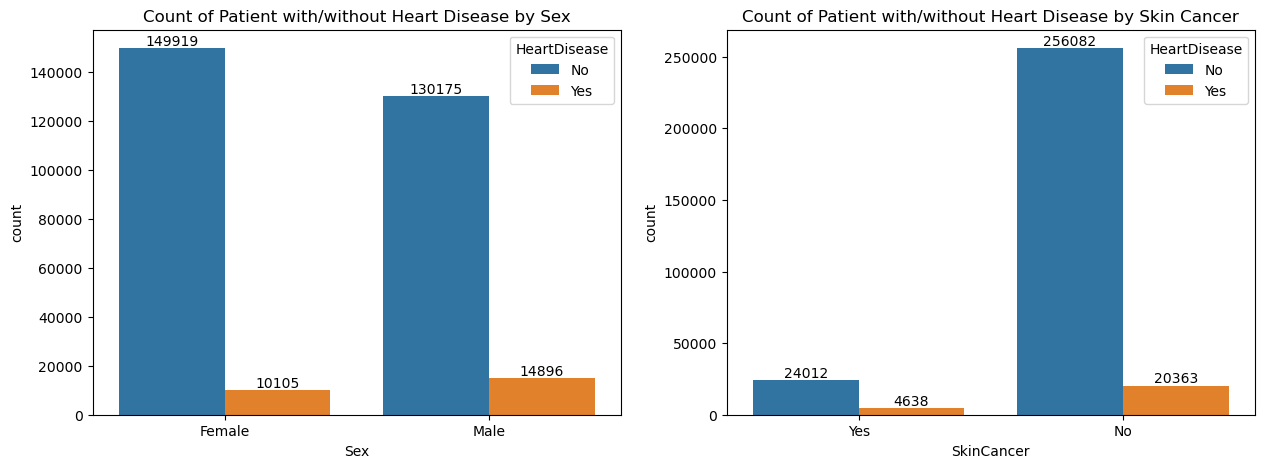

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Count of Patient with/without Heart Disease by Sex')
ax=sns.countplot(x='Sex',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.title('Count of Patient with/without Heart Disease by Skin Cancer')
ax=sns.countplot(x='SkinCancer',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

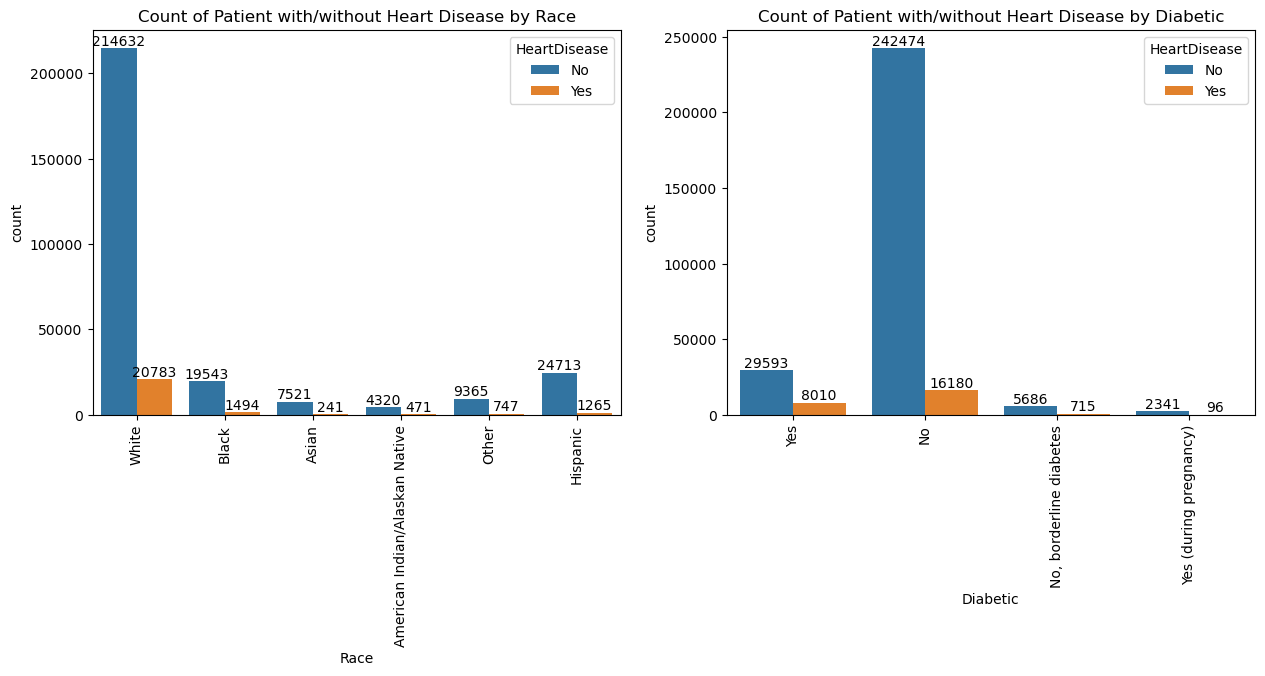

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Count of Patient with/without Heart Disease by Race')
ax=sns.countplot(x='Race',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Count of Patient with/without Heart Disease by Diabetic')
ax=sns.countplot(x='Diabetic',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)

plt.show()

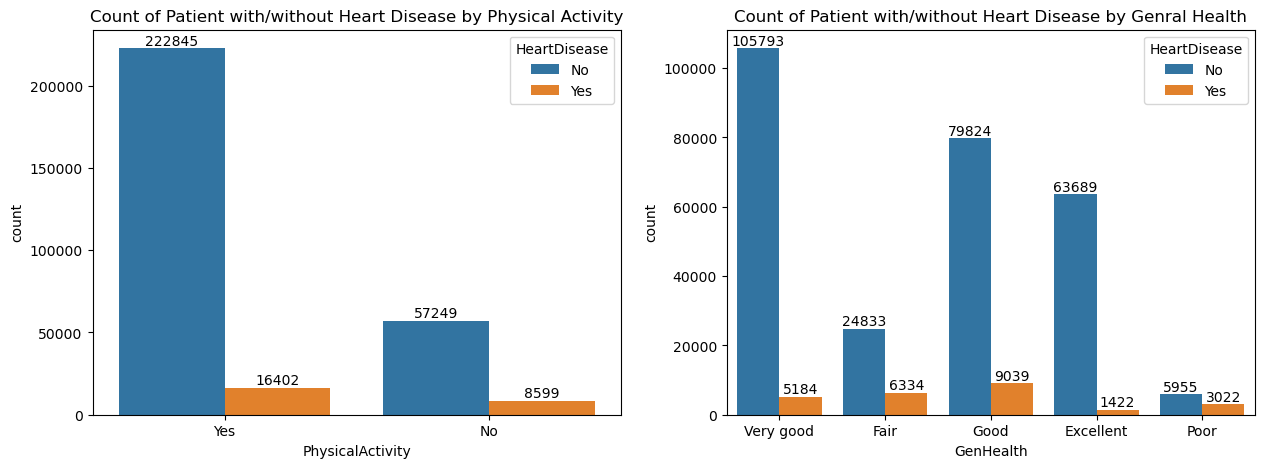

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Count of Patient with/without Heart Disease by Physical Activity')
ax=sns.countplot(x='PhysicalActivity',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.title('Count of Patient with/without Heart Disease by Genral Health')
ax=sns.countplot(x='GenHealth',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

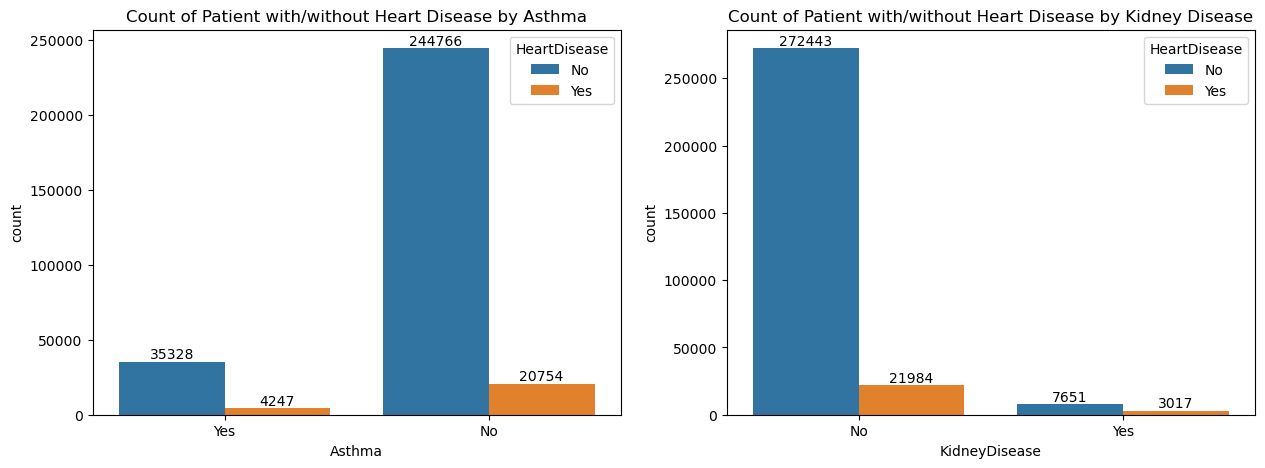

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Count of Patient with/without Heart Disease by Asthma')
ax=sns.countplot(x='Asthma',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.title('Count of Patient with/without Heart Disease by Kidney Disease')
ax= sns.countplot(x='KidneyDisease',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

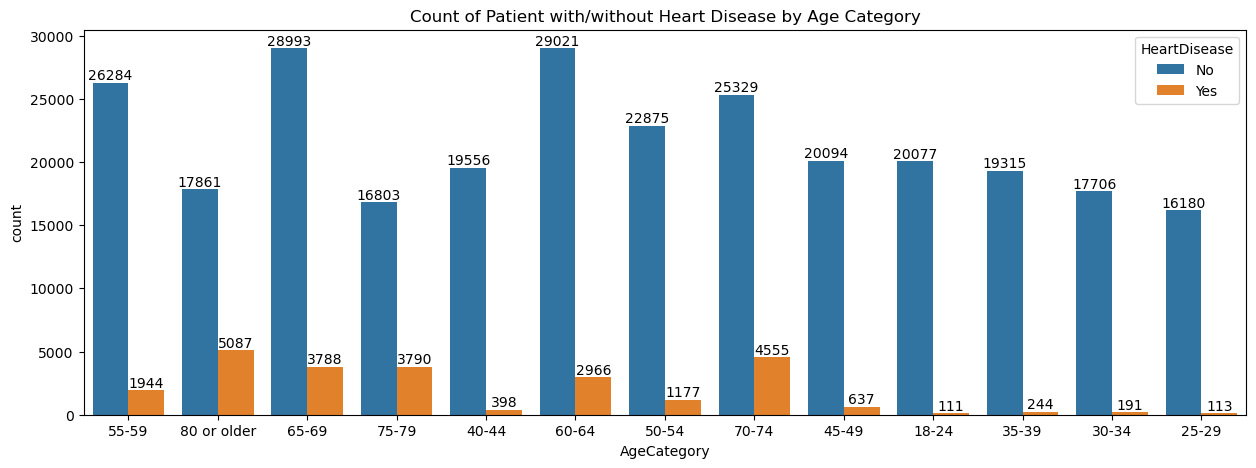

In [32]:
    
plt.figure(figsize=(15,5))
plt.title('Count of Patient with/without Heart Disease by Age Category')
ax=sns.countplot(x='AgeCategory',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)
    
plt.show()

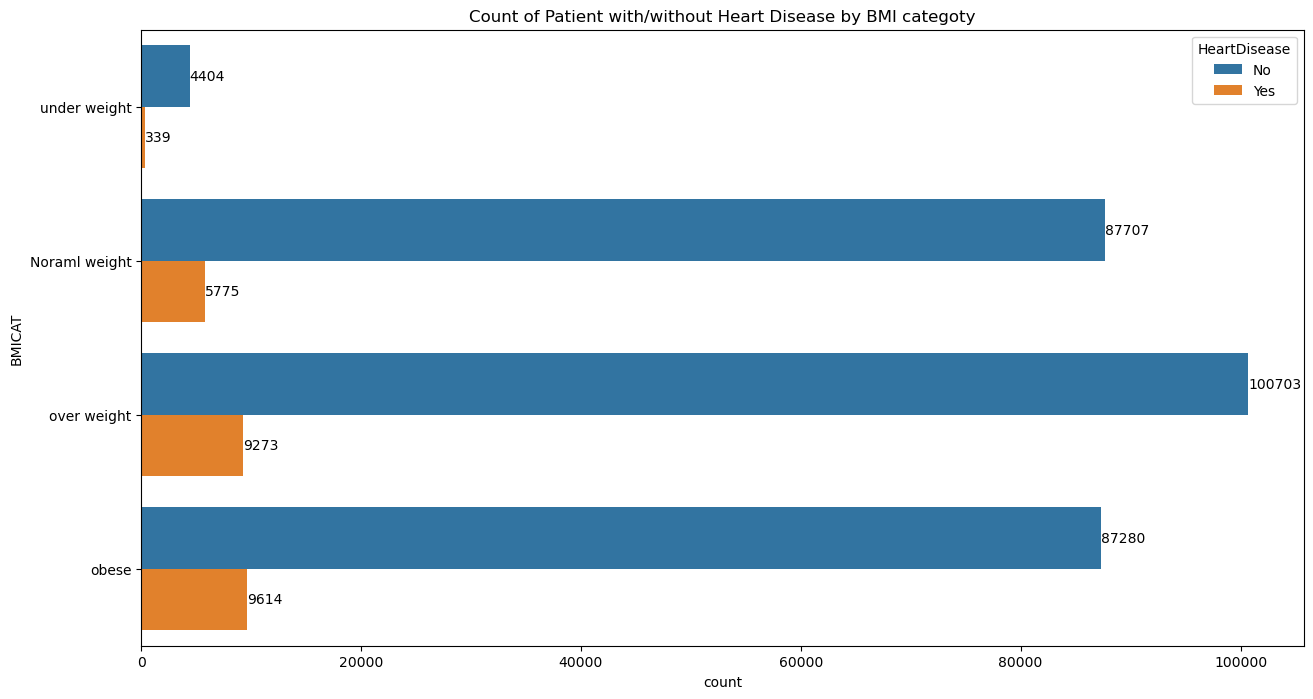

In [33]:
plt.figure(figsize=(15,8))
plt.title('Count of Patient with/without Heart Disease by BMI categoty')
ax= sns.countplot(y='BMICAT',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

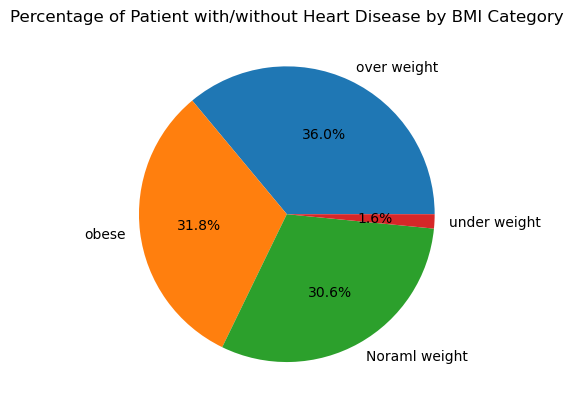

In [34]:
plt.pie(df['BMICAT'].value_counts().values,labels=df["BMICAT"].value_counts().index,autopct='%0.1f%%')
plt.title("Percentage of Patient with/without Heart Disease by BMI Category")
plt.show()

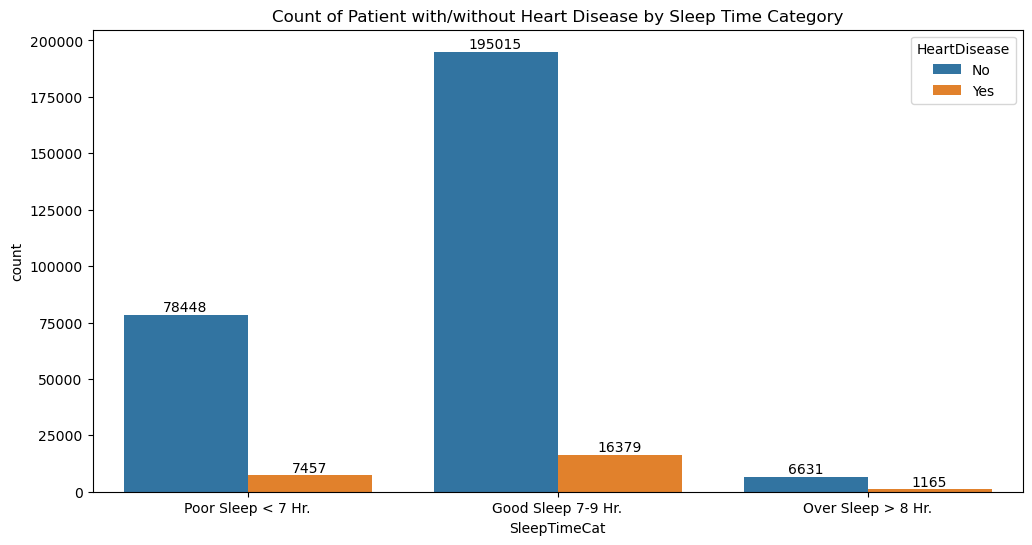

In [35]:
plt.figure(figsize=(12, 6))
plt.title('Count of Patient with/without Heart Disease by Sleep Time Category')
ax= sns.countplot(x='SleepTimeCat',data=df,hue="HeartDisease")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

* Most of people in our data are white and have no diabetic.* 
* observe that the people who are smoking are more susceptible to the heart disease.
* People who are not drinking alchol, some of them have a heat disease
* Stroke is highly correlated with heart disease.
* Most of them had done a physical activity during the past 30 days other than their regular job and in general they have very good health as they said.
* A litle of them who have asthma, kidney disease and skin cancer.
* The pecentage of heart disease is highest (> 10%) among Native americans, followed by whites (~9%). The least percentage of heart disease (~3%) is among asians.
* Most people said that they have generaly very good health. A few of people who said that they have generaly a poor health.
* Big factor in heart disease, as the amount of heart disease patients increases with age. The most susceptible people to the heart disease are people who are greater than 70 years old.
*  most heart disease patients believe their health is good, while most people who do not suffer heart diseases say their health is very good. Furhtermore, A lot more people who suffer from heart disease say they have poor or fair health compared to those who don't.

#### 12. Analysing data of those , who has heart disease to understand what factors that affects on Heart Health.

In [36]:
df1= df[(df['HeartDisease']=="Yes")] 

In [37]:
df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT,SleepTimeCat,Age
42,Yes,25.06,Non Smoker,Non Alcoholic,No,0.0,0.0,Yes,Female,80 or older,...,Yes,No,Good,7.0,No,No,Yes,over weight,Good Sleep 7-9 Hr.,80
43,Yes,30.23,Smoker,Non Alcoholic,No,6.0,2.0,Yes,Female,75-79,...,Yes,Yes,Fair,8.0,No,Yes,No,obese,Good Sleep 7-9 Hr.,77
45,Yes,20.37,Smoker,Non Alcoholic,No,3.0,0.0,No,Female,70-74,...,No,No,Poor,10.0,No,No,No,Noraml weight,Over Sleep > 8 Hr.,72
77,Yes,34.33,Non Smoker,Non Alcoholic,No,0.0,0.0,No,Female,55-59,...,No,Yes,Good,8.0,No,No,No,obese,Good Sleep 7-9 Hr.,57
78,Yes,28.29,Smoker,Non Alcoholic,No,30.0,30.0,No,Female,70-74,...,Yes,Yes,Poor,9.0,No,Yes,No,over weight,Good Sleep 7-9 Hr.,72


#### 13. Visulization of count of all variables according to Sex (Gender).

In [38]:
colors = ["skyblue","violet"]

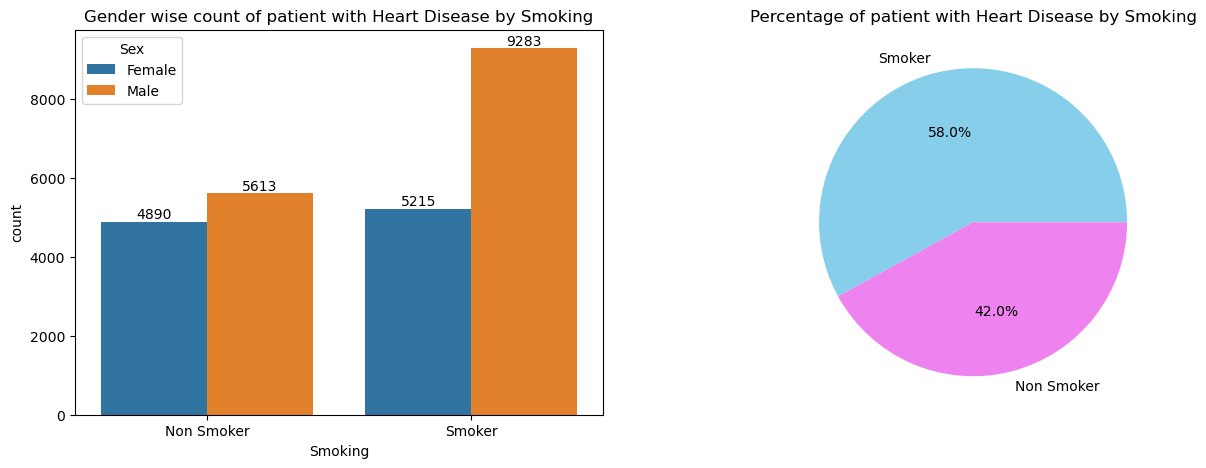

In [39]:

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Smoking')
ax= sns.countplot(x='Smoking',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(1,2,2)
plt.pie(df1['Smoking'].value_counts().values,labels=df1["Smoking"].value_counts().index,autopct='%0.1f%%',colors=colors)
plt.title("Percentage of patient with Heart Disease by Smoking")
plt.show()

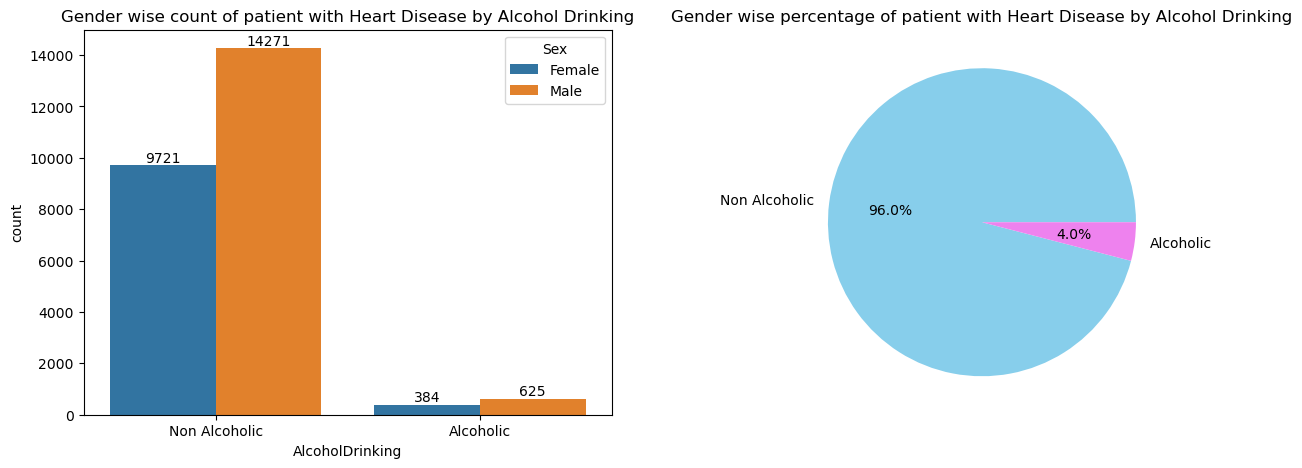

In [40]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Alcohol Drinking')
ax=sns.countplot(x='AlcoholDrinking',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(1,2,2)
plt.pie(df1['AlcoholDrinking'].value_counts().values,labels=df1["AlcoholDrinking"].value_counts().index,autopct='%0.1f%%',colors=colors)
plt.title("Gender wise percentage of patient with Heart Disease by Alcohol Drinking")
plt.show()

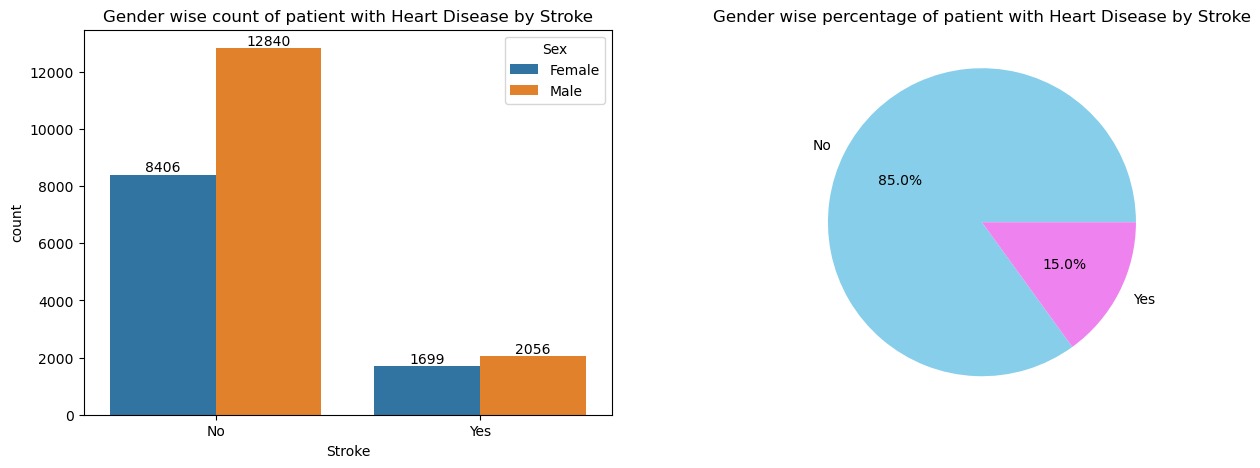

In [41]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Stroke')
ax=sns.countplot(x='Stroke',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.pie(df1['Stroke'].value_counts().values,labels=df1["Stroke"].value_counts().index,autopct='%0.1f%%',colors=colors)
plt.title("Gender wise percentage of patient with Heart Disease by Stroke")
plt.show()

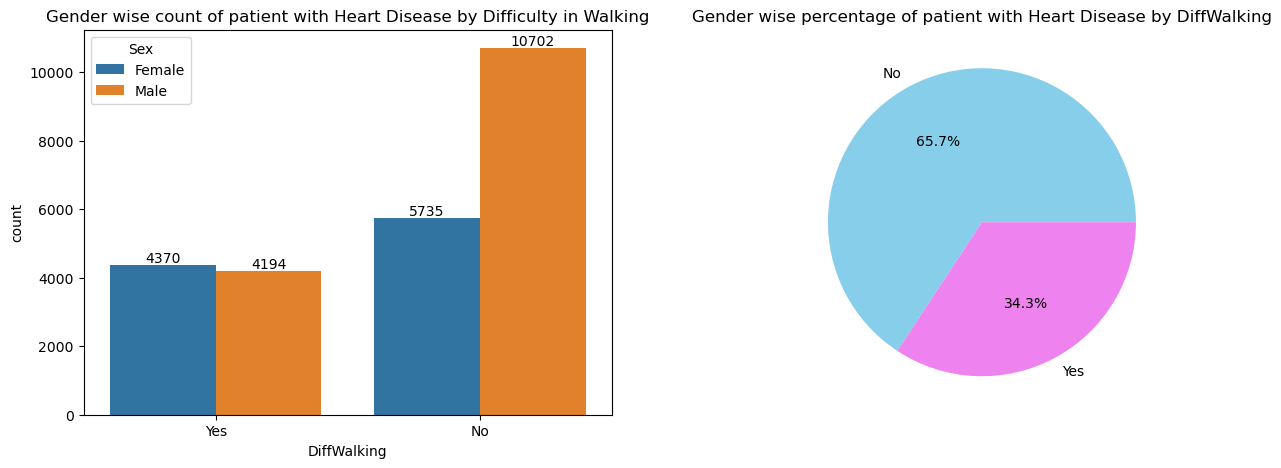

In [42]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Difficulty in Walking')
ax=sns.countplot(x='DiffWalking',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label) 
    
plt.subplot(1,2,2)
plt.pie(df1['DiffWalking'].value_counts().values,labels=df1["DiffWalking"].value_counts().index,autopct='%0.1f%%',colors=colors)
plt.title("Gender wise percentage of patient with Heart Disease by DiffWalking")   
plt.show()

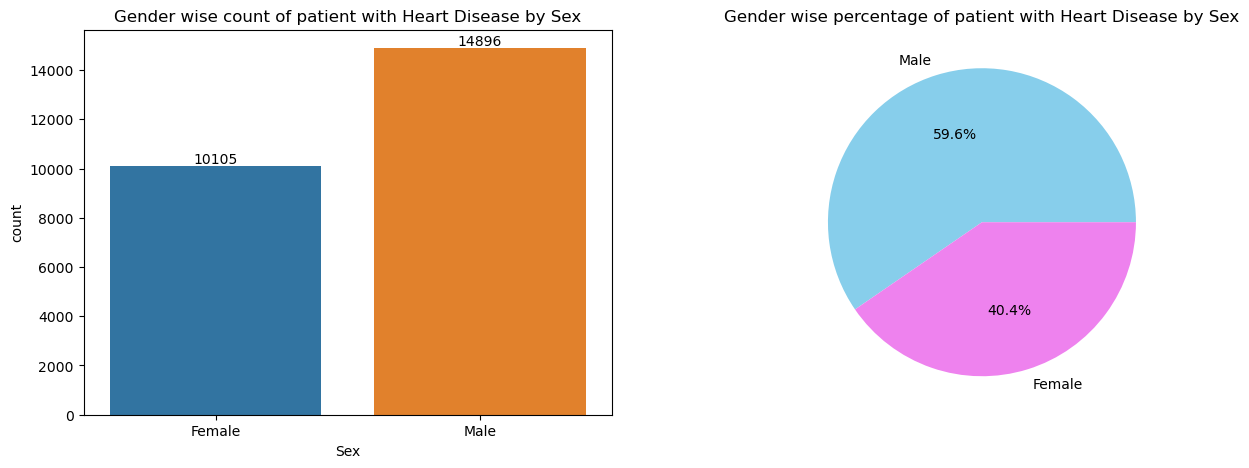

In [43]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Sex')
ax=sns.countplot(x='Sex',data=df1)
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.pie(df1['Sex'].value_counts().values,labels=df1["Sex"].value_counts().index,autopct='%0.1f%%',colors=colors)
plt.title("Gender wise percentage of patient with Heart Disease by Sex")
plt.show()

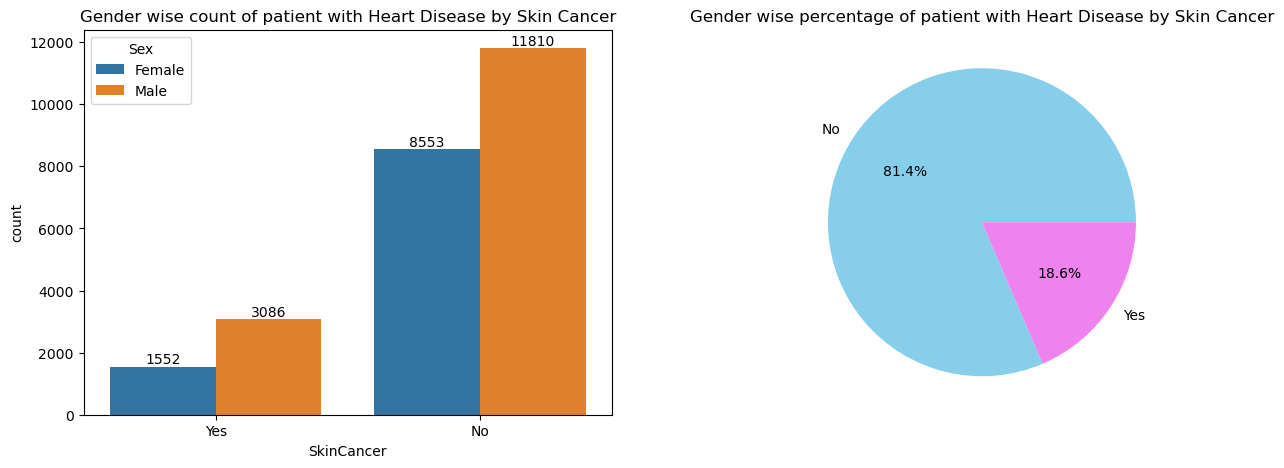

In [44]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Skin Cancer')
ax=sns.countplot(x='SkinCancer',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.pie(df1['SkinCancer'].value_counts().values,labels=df1["SkinCancer"].value_counts().index,autopct='%0.1f%%',colors=colors)
plt.title("Gender wise percentage of patient with Heart Disease by Skin Cancer")
plt.show()

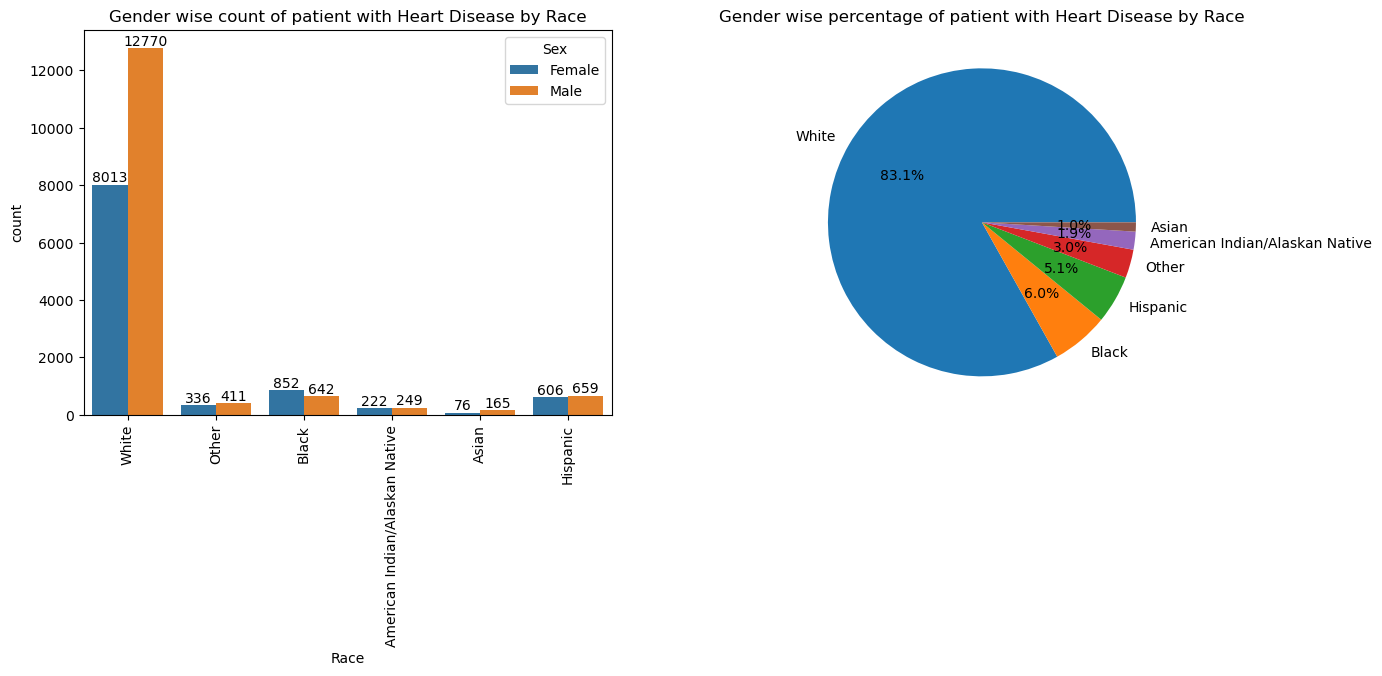

In [45]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Race')
ax=sns.countplot(x='Race',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(df1['Race'].value_counts().values,labels=df1["Race"].value_counts().index,autopct='%0.1f%%')
plt.title("Gender wise percentage of patient with Heart Disease by Race")
plt.show()

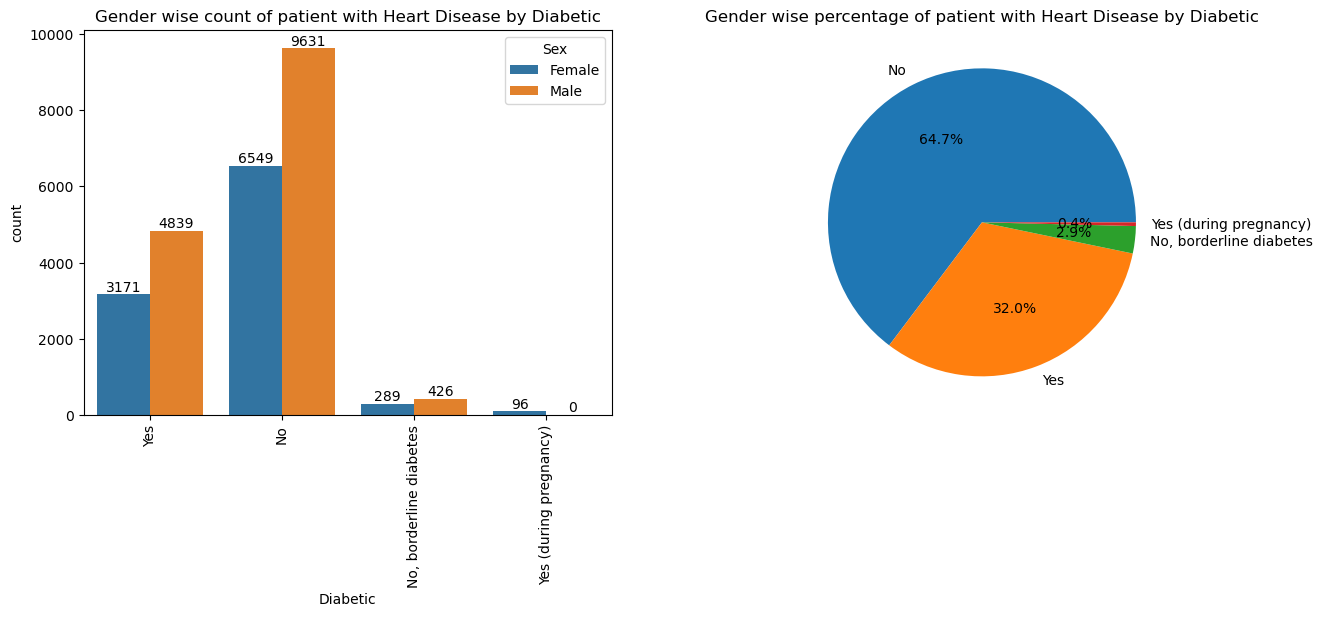

In [46]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Diabetic')
ax=sns.countplot(x='Diabetic',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(df1['Diabetic'].value_counts().values,labels=df1["Diabetic"].value_counts().index,autopct='%0.1f%%')
plt.title("Gender wise percentage of patient with Heart Disease by Diabetic")
plt.show()

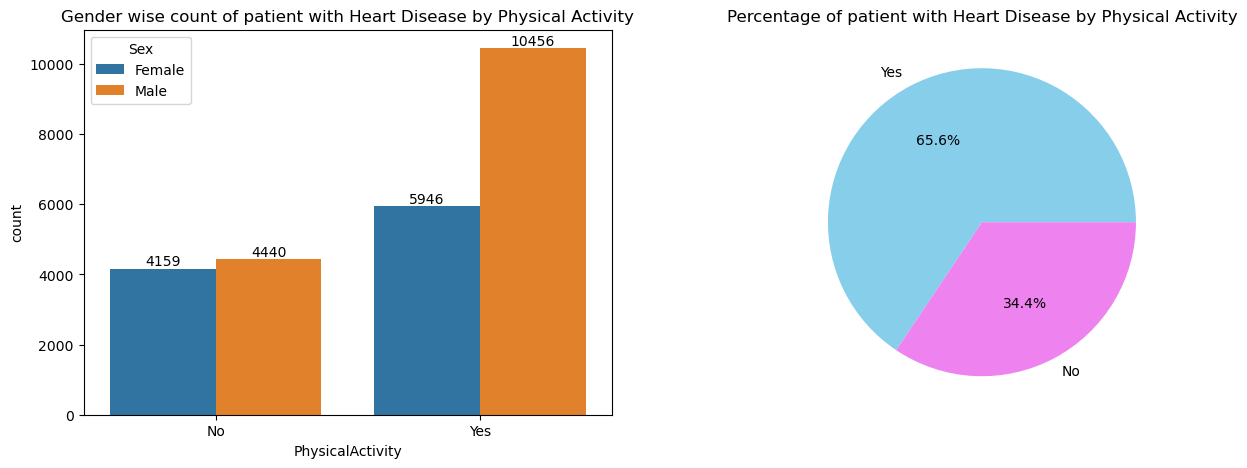

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Physical Activity')
ax=sns.countplot(x='PhysicalActivity',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.pie(df1['PhysicalActivity'].value_counts().values,labels=df1["PhysicalActivity"].value_counts().index,autopct='%0.1f%%',colors=colors)
plt.title("Percentage of patient with Heart Disease by Physical Activity")
plt.show()


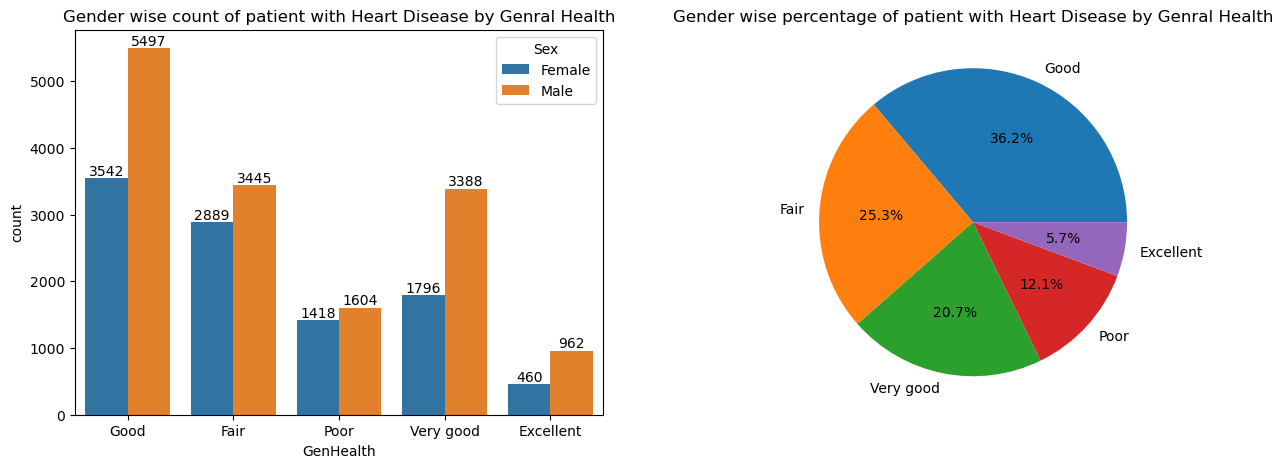

In [48]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Genral Health')
ax=sns.countplot(x='GenHealth',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.pie(df1['GenHealth'].value_counts().values,labels=df1["GenHealth"].value_counts().index,autopct='%0.1f%%')
plt.title("Gender wise percentage of patient with Heart Disease by Genral Health")
plt.show()

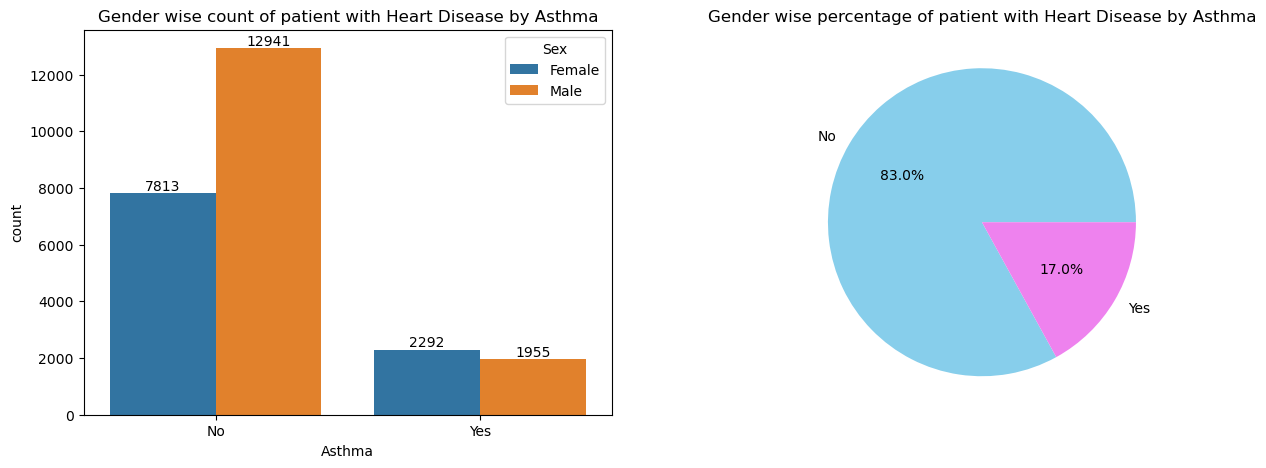

In [49]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Asthma')
ax=sns.countplot(x='Asthma',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.pie(df1['Asthma'].value_counts().values,labels=df1["Asthma"].value_counts().index,autopct='%0.1f%%',colors=colors)
plt.title("Gender wise percentage of patient with Heart Disease by Asthma")
plt.show()

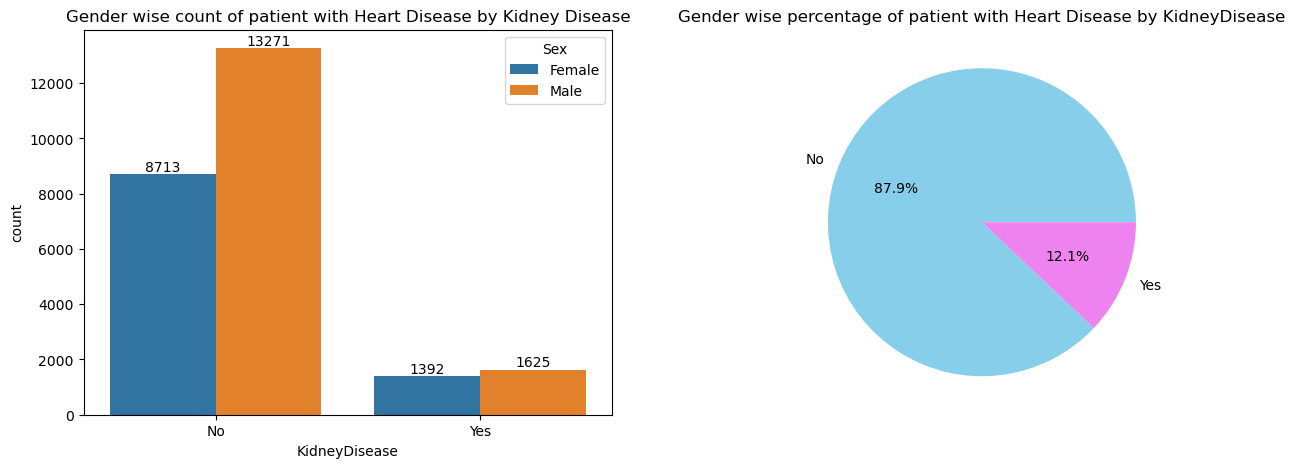

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Kidney Disease')
ax= sns.countplot(x='KidneyDisease',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.pie(df1['KidneyDisease'].value_counts().values,labels=df1["KidneyDisease"].value_counts().index,autopct='%0.1f%%',colors=colors)
plt.title("Gender wise percentage of patient with Heart Disease by KidneyDisease")
plt.show()

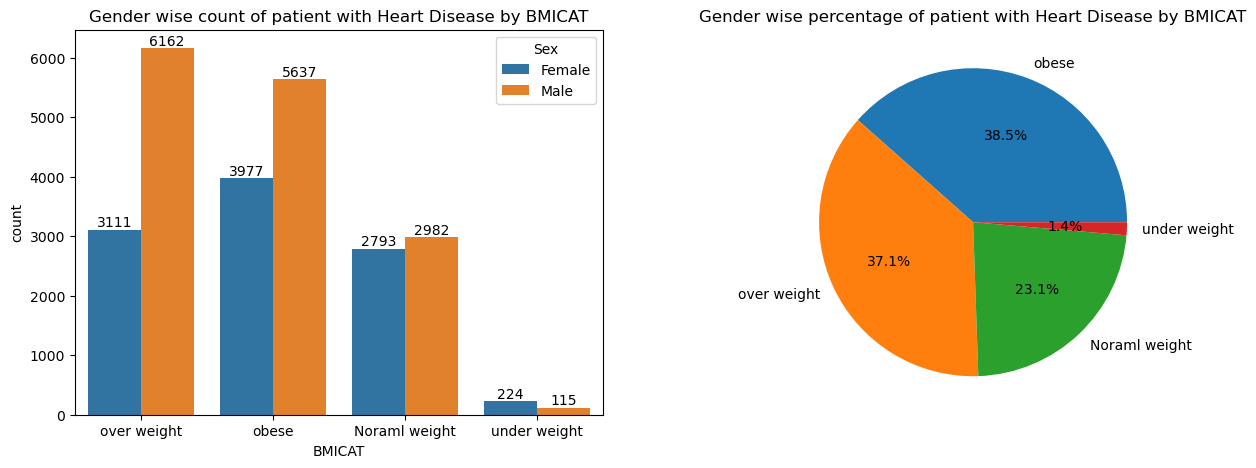

In [51]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by BMICAT')
ax= sns.countplot(x='BMICAT',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.pie(df1['BMICAT'].value_counts().values,labels=df1["BMICAT"].value_counts().index,autopct='%0.1f%%')
plt.title("Gender wise percentage of patient with Heart Disease by BMICAT")
plt.show()

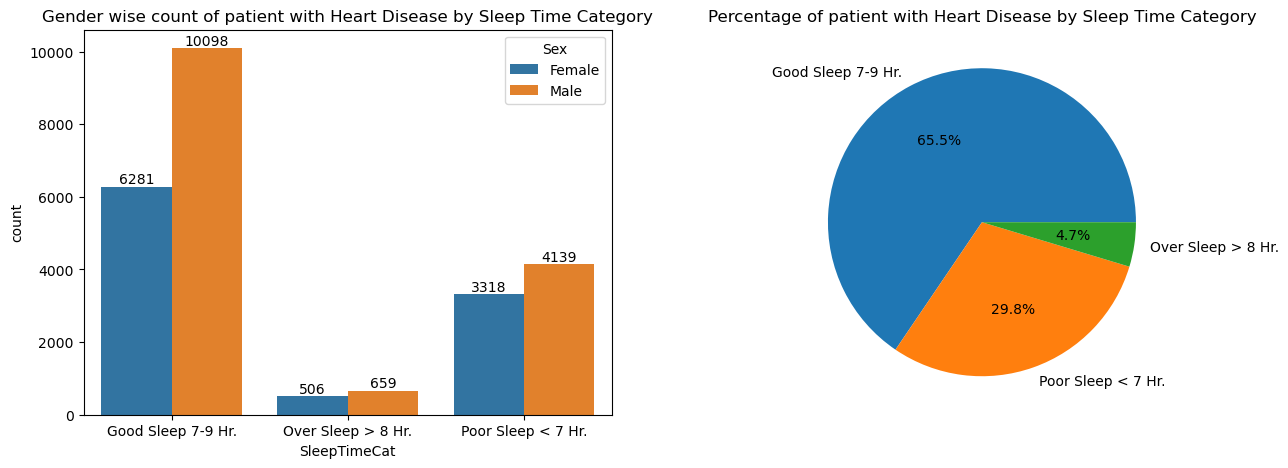

In [52]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Gender wise count of patient with Heart Disease by Sleep Time Category')
ax= sns.countplot(x='SleepTimeCat',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)
    
plt.subplot(1,2,2)
plt.pie(df1['SleepTimeCat'].value_counts().values,labels=df1["SleepTimeCat"].value_counts().index,autopct='%0.1f%%')
plt.title("Percentage of patient with Heart Disease by Sleep Time Category")
plt.show()

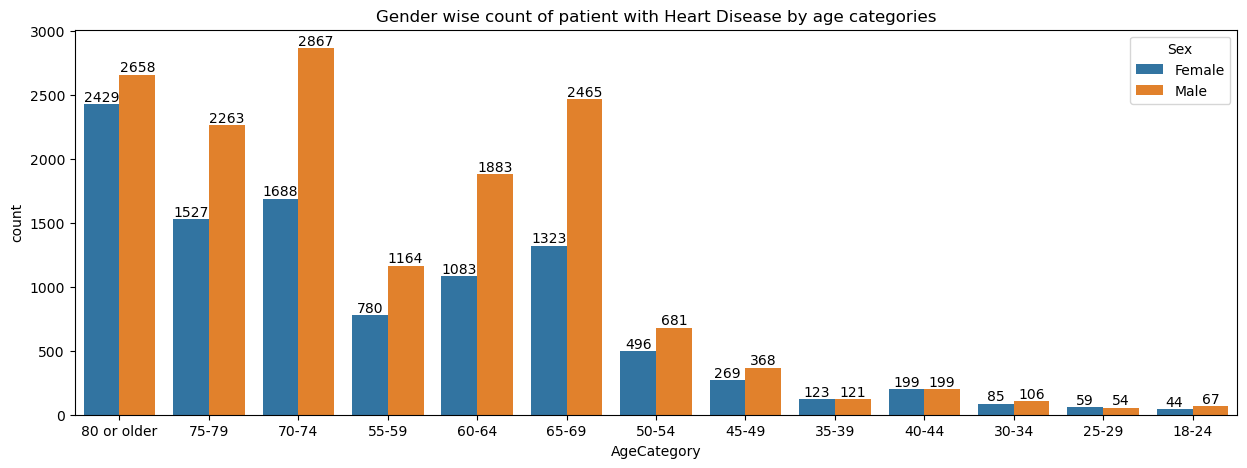

In [53]:

plt.figure(figsize=(15,5))
plt.title('Gender wise count of patient with Heart Disease by age categories')
ax=sns.countplot(x='AgeCategory',data=df1,hue="Sex")
for label in ax.containers:
    ax.bar_label(label)
    
plt.show()

* From all the graphs presented, it can be concluded that alcohol consumption, smoking and age are the main factors in heart disease.
* Males are more susceptible to the heart disease.

#### 14. visualization of numerical variables according to Heart disease.

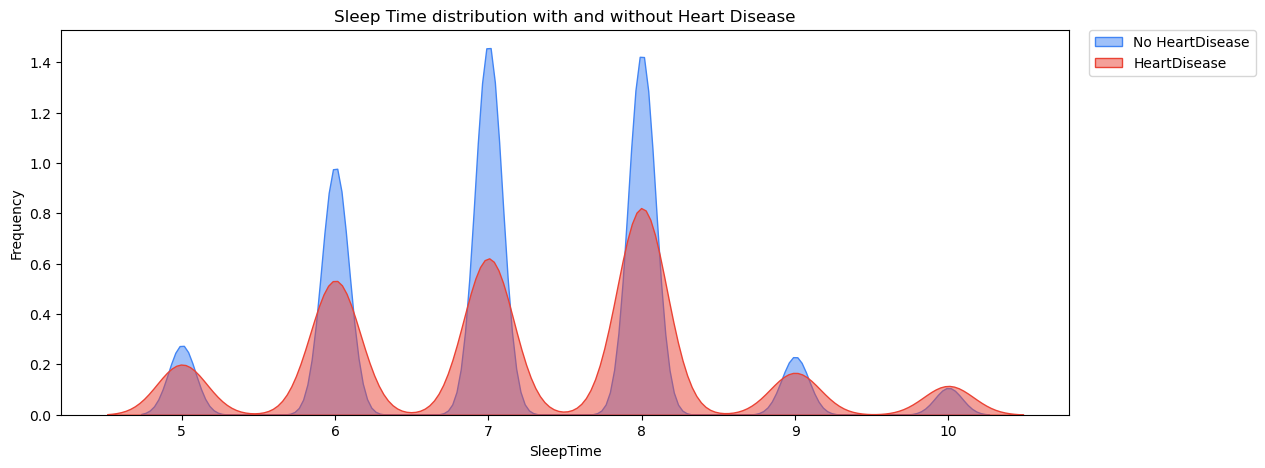

In [54]:
fig, ax = plt.subplots(figsize = (13,5))
plt.title("Sleep Time distribution with and without Heart Disease")
sns.kdeplot(df[df["HeartDisease"]=='No']["SleepTime"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Abnormal sleeep duration is more prevalent in heart disease patients. 

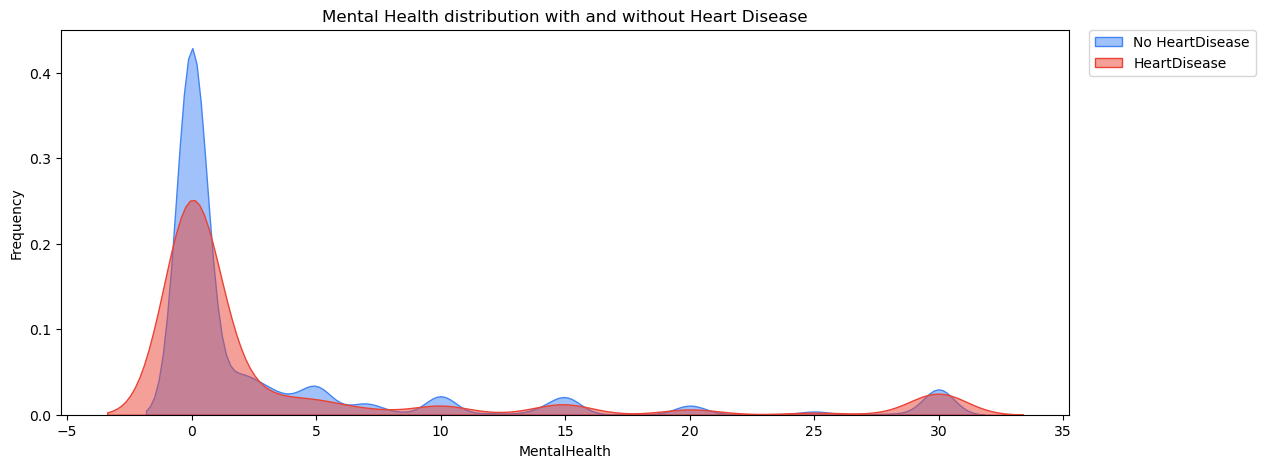

In [55]:
fig, ax = plt.subplots(figsize = (13,5))
plt.title("Mental Health distribution with and without Heart Disease")
sns.kdeplot(df[df["HeartDisease"]=='No']["MentalHealth"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["MentalHealth"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Mental illness influences heart disease.

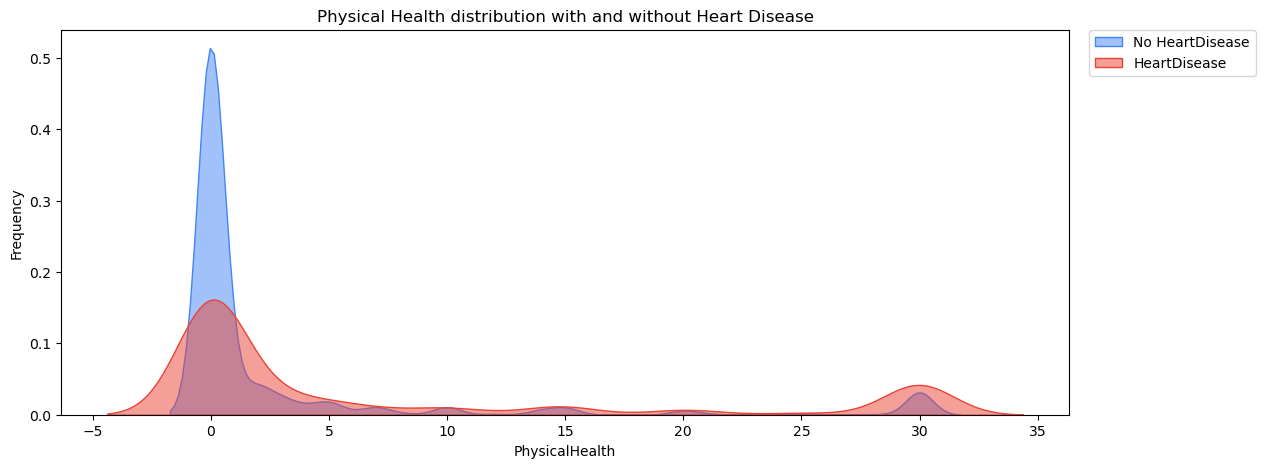

In [56]:
fig, ax = plt.subplots(figsize = (13,5))
plt.title("Physical Health distribution with and without Heart Disease")
sns.kdeplot(df[df["HeartDisease"]=='No']["PhysicalHealth"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

PhysicalHealth illness influences heart disease.

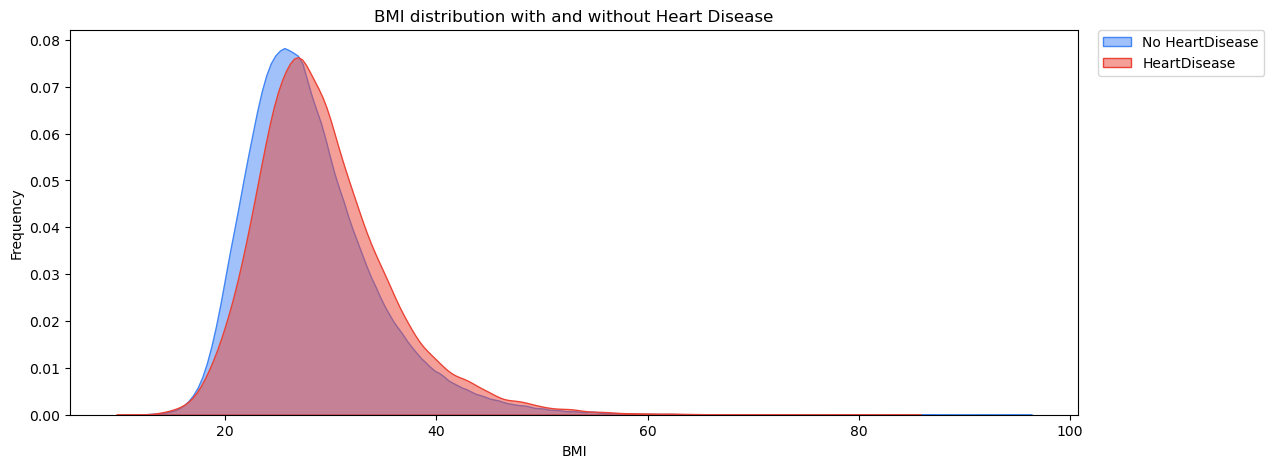

In [57]:
fig, ax = plt.subplots(figsize = (13,5))
plt.title("BMI distribution with and without Heart Disease")
sns.kdeplot(df[df["HeartDisease"]=='No']["BMI"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["BMI"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Individuals with Heart Disease have a higher BMI than those do not have Heart Disease.

In [58]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'BMICAT', 'SleepTimeCat',
       'Age'],
      dtype='object')

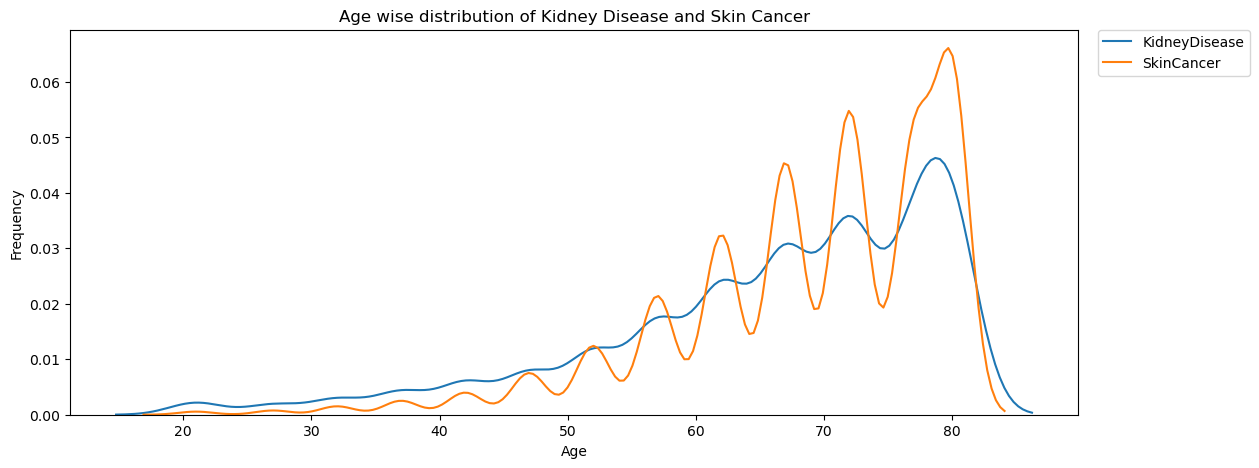

In [59]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["KidneyDisease"]=='Yes']["Age"], alpha=1,shade = False, label="KidneyDisease", ax = ax)
sns.kdeplot(df[df["SkinCancer"]=='Yes']["Age"], alpha=1,shade = False, label="SkinCancer", ax = ax)
plt.title("Age wise distribution of Kidney Disease and Skin Cancer")
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

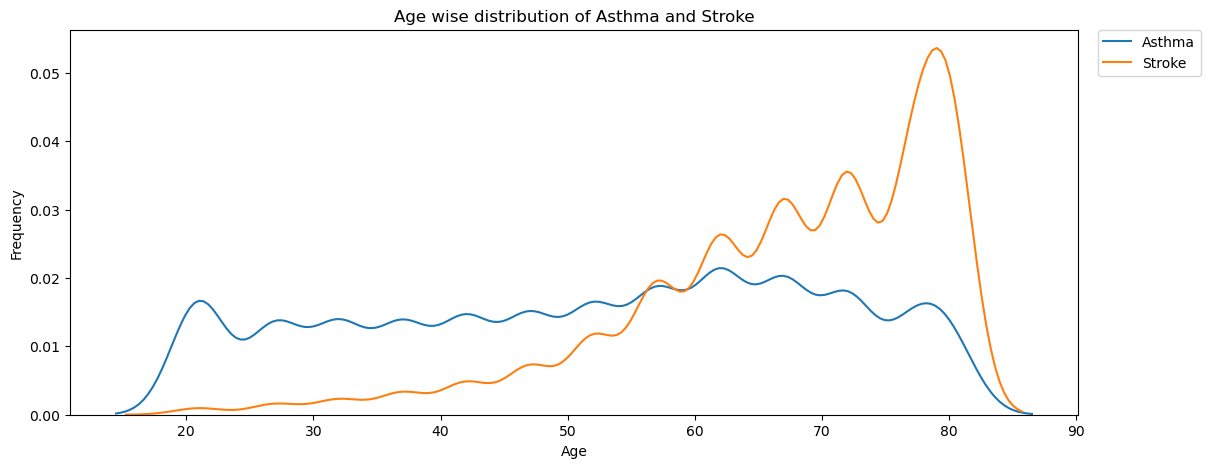

In [60]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["Asthma"]=='Yes']["Age"], alpha=1,shade = False, label="Asthma", ax = ax)
sns.kdeplot(df[df["Stroke"]=='Yes']["Age"], alpha=1,shade = False, label="Stroke", ax = ax)
plt.title("Age wise distribution of Asthma and Stroke")
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

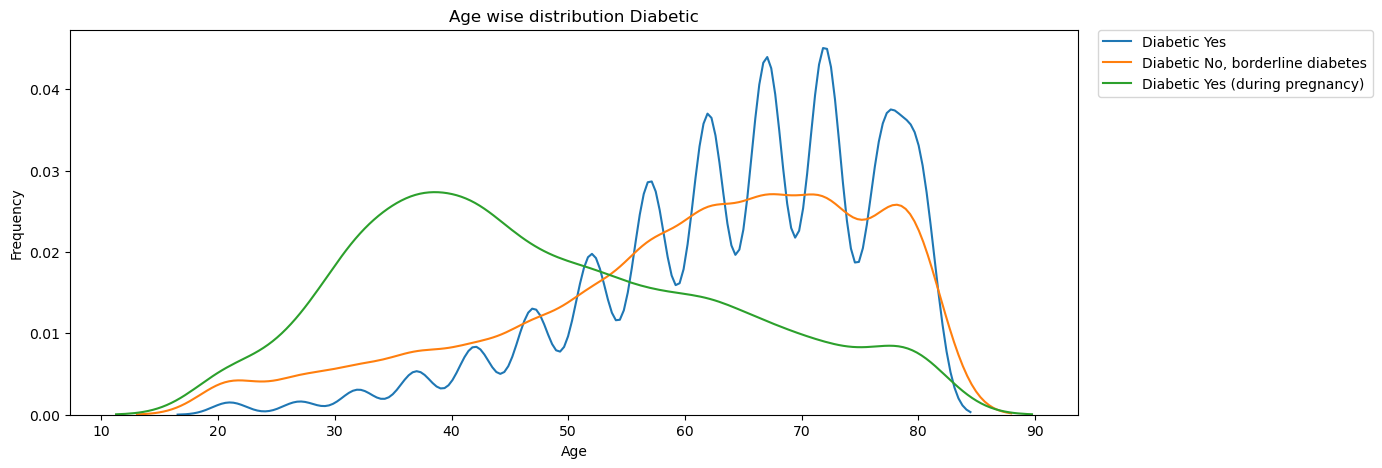

In [61]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["Diabetic"]=='Yes']["Age"], alpha=1,shade = False, label="Diabetic Yes", ax = ax)
sns.kdeplot(df[df["Diabetic"]=='No, borderline diabetes']["Age"], alpha=1,shade = False, label="Diabetic No, borderline diabetes", ax = ax)
sns.kdeplot(df[df["Diabetic"]=='Yes (during pregnancy)']["Age"], alpha=1,shade = False, label="Diabetic Yes (during pregnancy)", ax = ax)
plt.title("Age wise distribution Diabetic")
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [62]:
df.GenHealth.value_counts()

Very good    110977
Good          88863
Excellent     65111
Fair          31167
Poor           8977
Name: GenHealth, dtype: int64

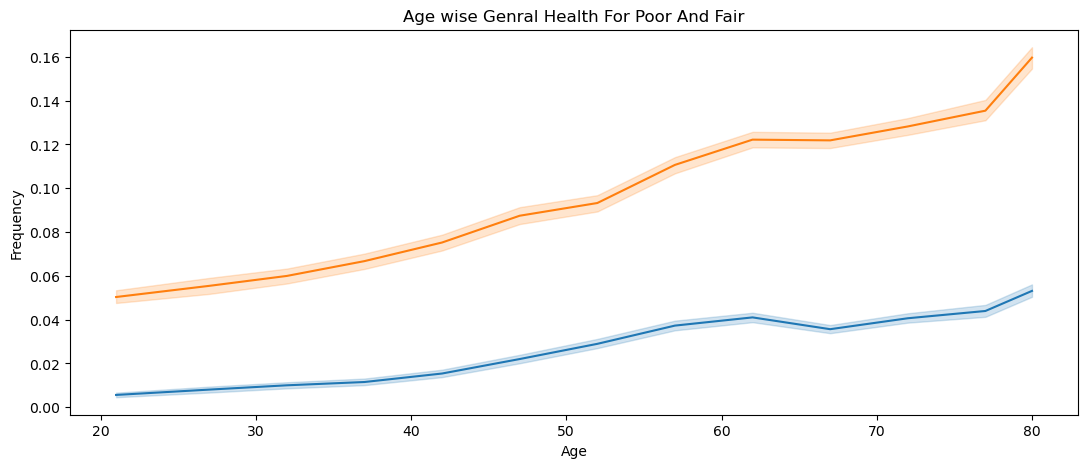

In [63]:
fig, ax = plt.subplots(figsize = (13,5))
sns.lineplot(data=df,x="Age",y=df["GenHealth"]=='Poor')
sns.lineplot(data=df,x="Age",y=df["GenHealth"]=='Fair')
plt.title("Age wise Genral Health For Poor And Fair")
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
plt.show()

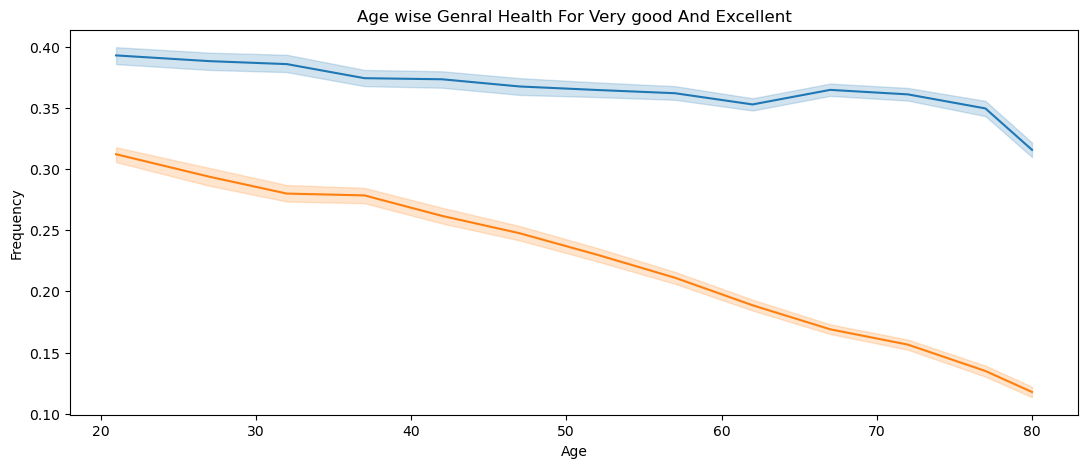

In [64]:
fig, ax = plt.subplots(figsize = (13,5))
sns.lineplot(data=df,x="Age",y=df["GenHealth"]=='Very good')

sns.lineplot(data=df,x="Age",y=df["GenHealth"]=='Excellent')
plt.title("Age wise Genral Health For Very good And Excellent")

ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
plt.show()

#### 14. Conclusion -

* In our sample, around 8 among 100 individuals suffer from heart disease.

* The BMI of heart disease patients is slightly higher than that of healthy individuals.

* The older the individual, the more susceptible they are to heart disease.

* ~10% of males suffer from heart disease, while only ~7% of females do.

* The pecentage of heart disease is highest (> 10%) among Native americans, followed by whites (~9%). The least percentage of heart disease (~3%) is among asians.

* A lot more people who suffer from heart disease say they have poor or fair health compared to those who don't.

* 79% of healthy individuals have been physically active in the past 30 days, compared to 64% in heart disease patients.

* Abnormal sleeep duration is more prevalent in heart disease patients. Even though heart disease patients make 8.5% of the sample, they have higher percentages of sleep less than 6 hours or more than 9 hours, which is considered abnormal.

* ~12% of people who smoke suffer from heart disease. In contrast, ~5% of non-smokers suffer from heart disease.

* Surprisingly, people who drink alcohol have a lower percentage of heart disease (~4%) than those who do not (~9%).

* Having a stroke is highly correlacted with heart disease. People who have had a stroke before have a heart disease percentage of around 48%. On the other hand, people who did not suffer a stroke had a significantly lower percentage of heart disease (~8%).

* Diabetic people are at higher risk of heart disease (~25%).

* Asthmatic people are at a slightly higher risk of heart disease.

* Those who have suffered from kidney disease are at a sginificantly higher risk of heart disease. With a percentage of ~30% compared to ~9% in healthy people.

* People who suffered from skin cancer are at a moderately higher risk of heart disease (~18% vs ~9%).

* Difficilty of walking is present in ~18% of heart disease patients vs ~7% in healthy individuals.

* The BMI distribution differs slightly in patients of different diseases. With diabetic people having the highest BMI mode, and stroke victims having the lowest BMI mode.

* Mental health, sleep duration, and physical health are similar among people who suffer from different dieseases.

* ~64% of people who say they have poor health are smokers. While people who say they have excellent health are 30% smokers.

### <center>RECOMENDATIONS</center>

#### 10 Essential Measures to Prevent Cardiovascular Disease

1. Healthy nutrition. The composition of the daily diet significantly affects the state of blood vessels and the heart. Frequent and excessive consumption of fatty and fried foods, coffee, chicken eggs, salt and sugar is a sure way to worsen the condition of blood vessels and develop heart attacks, strokes, hypertension and other dangerous ailments. The increased content of saturated fats, caffeine, salt and sugar increases the level of "bad" cholesterol and blood sugar. Under their influence, atherosclerotic plaques that calcify over time are formed on the vascular walls. There is a narrowing of the lumen of the vessels, leading to their wear. This factor increases the load on the heart, arterial hypertension develops. Hypertension, in turn, leads to the development of many serious diseases that can lead to disability and death.

2. Fighting excess weight. Obesity always increases the risk of vascular and heart pathologies - every extra 10 kg can increase blood pressure by 10-20 mm Hg. Art. All people need to be regularly weighed and have their abdominal circumference measured to determine abdominal obesity.

3. Fight against physical inactivity. Hypodynamia is one of the common causes of diseases of the heart and blood vessels. This is confirmed by the facts about the low physical activity of citizens and the elderly. Remember! Physical activity should be appropriate for age and general health. Be sure to check with your doctor if you have any contraindications for physical education, and what loads are acceptable for you!

4. Giving up bad habits. All studies on the effects of smoking, alcohol and drugs point to one indisputable fact - giving up these bad habits can reduce the risk of heart and vascular diseases by dozens of times. If you cannot get rid of addiction yourself, then to give up addictions, you should use the following methods: to quit smoking - acupuncture, nicotine patches or chewing gums, hypnosis; to refuse alcohol or drug addiction - a course of treatment and rehabilitation by a professional narcologist.

5. Fighting stress. Frequent stressful situations lead to wear of blood vessels and myocardium. During nervous tension, the level of adrenaline rises. In response to its impact, the heart begins to beat faster, and the vessels are constricted by spasm. As a result, there is a jump in blood pressure, and the myocardium wears out much faster.

6. Self-control of blood pressure and its timely reduction An increase in blood pressure leads to the development of coronary artery disease, heart attacks, strokes and other pathologies of the heart and blood vessels. That is why all people should regularly monitor pressure indicators.

7. Systematic preventive examination. Scheduled preventive examination and timely visits to a cardiologist should become the norm for people at risk for the development of pathologies of the heart and blood vessels. The same applies to people who report an increase in blood pressure when measured independently. Do not neglect the recommendations of your doctor!

8. Controlling blood cholesterol levels It is necessary to start annually to control the level of cholesterol in the blood after 30 years. In healthy people, its level should not exceed 5 mmol / l, and in patients with diabetes - 4-4.5 mmol / l.

9. Blood sugar control It is necessary to start monitoring blood sugar levels annually after 40-45 years. Its level should not exceed 3.3-5.5 mmol / l (in the blood from a finger), 4-6 mmol / l (in the blood from a vein).

10. Taking blood thinners For people at risk, a cardiologist may recommend taking blood thinners. The choice of the drug, its dose, the duration of the course of administration is determined only by the doctor, guided by the data of analyzes and other examinations.

**Compliance with these rules for the prevention of cardiovascular diseases will significantly reduce the risk of their development. Remember this and be healthy!**